In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
y_train.shape

(50000, 1)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)

In [6]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
y_test = y_test.reshape(-1,)

In [7]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [22]:
def plot_sample(X,y,index):
  plt.figure(figsize = (10,2))
  plt.imshow(X[index])
  plt.xlabel(y[index])



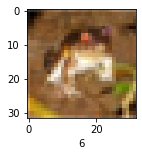

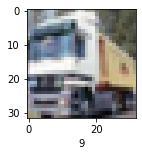

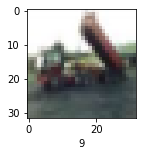

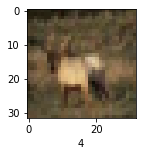

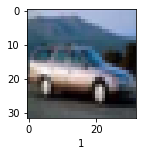

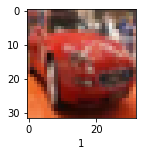

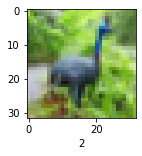

In [23]:
data = [3,5,6,7,8,3,4]
for i in range(len(data)):

  plot_sample(X_train, y_train, i)

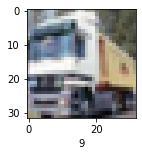

In [15]:
plot_sample(X_train,y_train,1)

In [24]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [27]:
ann1 = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(300,activation='relu'),
    layers.Dense(300,activation='relu'),
    layers.Dense(2000,activation='relu'),
    layers.Dense(10, activation='softmax')

])

ann1.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann1.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 29s 18ms/step - loss: 1.9093 - accuracy: 0.3104
Epoch 2/5
1563/1563 [==============================] - 25s 16ms/step - loss: 1.7000 - accuracy: 0.3952
Epoch 3/5
1563/1563 [==============================] - 26s 16ms/step - loss: 1.6115 - accuracy: 0.4255
Epoch 4/5
1563/1563 [==============================] - 25s 16ms/step - loss: 1.5484 - accuracy: 0.4494
Epoch 5/5
1563/1563 [==============================] - 25s 16ms/step - loss: 1.5001 - accuracy: 0.4668


In [29]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann1.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 7ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.41      0.49      1000
           1       0.60      0.59      0.59      1000
           2       0.41      0.19      0.26      1000
           3       0.35      0.23      0.28      1000
           4       0.46      0.20      0.28      1000
           5       0.36      0.42      0.38      1000
           6       0.33      0.79      0.46      1000
           7       0.70      0.32      0.44      1000
           8       0.47      0.73      0.57      1000
           9       0.48      0.53      0.50      1000

    accuracy                           0.44     10000
   macro avg       0.47      0.44      0.43     10000
weighted avg       0.47      0.44      0.43     10000



In [30]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])